## Loading our dataset

In [1]:
from keras.datasets import mnist

#Loads the MNIST dataset
(X_train, y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)


(60000, 28, 28)


#### 2A : Examine the  size and image dimension

##### We see that our training data consist of 60,000 samples of training data, 10,000 samples of test data
##### Our labels are appropriately sized as well
##### Our Image dimenions are 28 x 28, with no color channels (i.e. they are grayscale, so no BGR channels)

In [2]:
#priniting the number of samples in X_train,X_test,y_train,y_test

print("Initial number of dimension of X_train ",str(X_train.shape)) 
print("Number of samples in our trainning data ",str(len(X_train)))
print("Number of labels in our training data ",str(len(y_train)))
print ("Number of samples in our test data: " + str(len(X_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of X_train:" + str(X_train[0].shape))
print ("Labels in X_train:" + str(y_train.shape))
print()
print ("Dimensions of X_test:" + str(X_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial number of dimension of X_train  (60000, 28, 28)
Number of samples in our trainning data  60000
Number of labels in our training data  60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of X_train:(28, 28)
Labels in X_train:(60000,)

Dimensions of X_test:(28, 28)
Labels in y_test:(10000,)


### 2B - Seeing images in our dataset 

In [3]:
import cv2
import numpy as np

#use open cv to display random 6 images from our dataset
for i in range(0,6):
    random_num = np.random.randint(0,len(X_train))
    image = X_train[random_num]
    window_name = 'Random Sample #' + str(i)
    cv2.imshow(window_name,image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

### doing the same thing but using matplotlib to plot 6 images

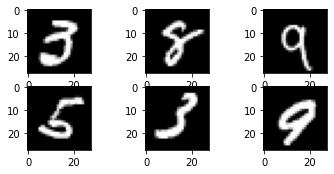

In [4]:
import matplotlib.pyplot as plt

plt.subplot(3,3,1)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap  = plt.get_cmap('gray'))

plt.subplot(3,3,2)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap  = plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))





# we set the color map to grey since our image dataset is grayscale

## Alternatively using for loop

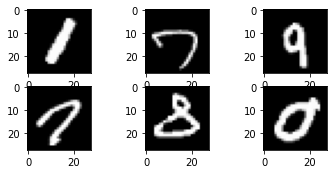

In [5]:
for i in range(0,6):
    plt.subplot(3,3,0 + 1 + i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num],cmap = plt.get_cmap('gray')) 


### 3A Prepare our dataset for traininng

In [6]:
#Storing the number of rows and columns
image_rows = X_train[0].shape[0]
print("Number of rows are:",image_rows)
image_cols = X_train[0].shape[1]
print("Number of columns are:",image_cols)


# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)

X_train = X_train.reshape(X_train.shape[0],image_rows,image_cols,1)
X_test = X_test.reshape(X_test.shape[0],image_rows,image_cols,1)

#Store the shape of single image
input_shape = (image_rows,image_cols,1)

#Change our image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalising our data(to bring it in the range between 0-1)
X_train = X_train/255
X_test = X_test/255

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Number of rows are: 28
Number of columns are: 28
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


### ONE HOT ENCODING

In [7]:
from keras.utils import np_utils

#Now one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Printing the number of coolumns in our one hot encoded matrix
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]


print("num classes :",num_classes)
print(num_pixels)

Number of Classes: 10
num classes : 10
784


# 4 - Create Our Model
#### We're constructing a simple but effective CNN that uses 32 filters of size 3x3
#### We've added a 2nd CONV layer of 64 filters of the same size 3x2
#### We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
#### We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
#### How we apply a dropout where P is set to 0.5
#### Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [8]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,MaxPooling2D,Conv2D
from keras import backend as K
from keras.optimizers import SGD #Stochastic grad descent

#Create model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = input_shape))
# input_shape = (image_rows,image_cols,1)
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #To  reduce overfitting
model.add(Flatten())
model.add(Dense(128,activation='relu')) #Dense implements the operation output
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax')) ##num_classes = y_test.shape[1] = 10
          
model.compile(loss='categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])


# Once the model is created, you can config the model 
# with losses and metrics with model.compile(),
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Train our model

#### We place our formatted data as the inputs and set the batch size, number of epochs
#### We store our model's training results for plotting in future
#### We then use Kera's molel.evaluate function to output the model's fina performance. Here we are examing Test Loss and Test Accuracy

In [9]:
batch_size = 32
epochs = 10

history = model.fit(X_train,y_train,batch_size = batch_size, epochs = epochs,
                   verbose = 1, validation_data=(X_test,y_test))
score = model.evaluate(X_test,y_test,verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1875/1875 [==============================] - 40s 18ms/step - loss: 0.9224 - accuracy: 0.7018 - val_loss: 0.1921 - val_accuracy: 0.9429
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3014 - accuracy: 0.9082 - val_loss: 0.1369 - val_accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2239 - accuracy: 0.9345 - val_loss: 0.1021 - val_accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1762 - accuracy: 0.9478 - val_loss: 0.0821 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1417 - accuracy: 0.9593 - val_loss: 0.0690 - val_accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1224 - accuracy: 0.9636 - val_loss: 0.0609 - val_accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1100 - accuracy: 0.9675 - val_loss: 0.0532 -

#   Plotting our loss and accuracy charts

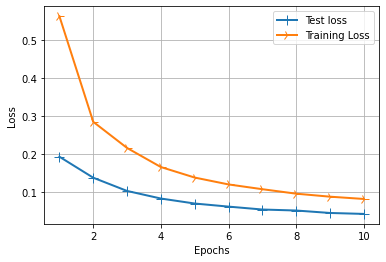

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs,val_loss_values,label='Test loss')
line2 = plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### 7A Saving our model 

In [12]:
model.save("Digit_Recogniser_Epochs.h5")


### Loading our saved model

In [14]:
from keras.models import load_model

classifier = load_model("Digit_Recogniser_Epochs.h5")

## Inputing test data in our classifier

In [33]:
import cv2
import numpy as np

def draw_test(name,pred,input_im):
    Black = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0]
                                       ,cv2.BORDER_CONSTANT,value = Black)
    expanded_image = cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,
               4,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
for i in range(0,10):
    rand = np.random.randint(0,len(X_test))
    input_im = X_test[rand]
    
    imageL = cv2.resize(input_im,None,fx = 4, fy =4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    # Get predictions
    res = str(np.argmax(model.predict(input_im, 1, verbose = 0)[0]))
    draw_test("predictions",res,imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
!git add Digit_Recogniser.ipynb
!git commit -m "21:40/28-04-2021"
!git push origin main